<br><br><br>

### HydroBASINS (Siberia)
- https://www.hydrosheds.org/products/hydrobasins

<br><br><br>

In [1]:
# File and Data Manipulation
import os                       # interacting with the operating system
import glob                     # retrieving files/pathnames matching a specified pattern
from collections import Counter # counting hashable objects
import shutil                   # high-level file operations
import pickle                   # serializing and de-serializing Python object structures

# Data Analysis
import numpy as np              # numerical operations
import pandas as pd             # data manipulation and analysis

# Geospatial Data Handling
import geopandas as gpd         # working with geospatial data

# Data Visualization
import matplotlib.pyplot as plt       # creating static, interactive, and animated visualizations
plt.style.use("default")              # Set the default style matplotlib plots
import matplotlib.colors as mcolors   # colors for legend
import matplotlib.patches as mpatches # drawing patches (shapes) for legend

# Suppress Warnings
import warnings                 # handling warnings
warnings.filterwarnings("ignore") # Suppress all warnings (use with caution!)

##### Link Notebook to the Directory of Interest

In [2]:
# Link Notebook to the Directory of Interest
os.chdir('J:\Chomiak_Python\Chomiak_Notebooks\Maps_Siberia_Data')

##### Import Main Shapefile

In [3]:
# Yenisey Watershed
AGRO_Watershed = gpd.read_file('ArcticGRO_Yenisei_watershed')

# Lakes
gpd_lakes = gpd.read_file('GeoPandas_Yenisei_lakes')

#### Describe the Folder of Interest

In [4]:
def summarize_folder_contents(folder_path):
    # List all files in the folder using glob
    all_files = glob.glob(os.path.join(folder_path, "*"))

    # Get just the filenames (without full path)
    file_names = [os.path.basename(file) for file in all_files]

    # Get the sizes of the files in megabytes
    file_sizes_mb = [os.path.getsize(file) / (1024 * 1024) for file in all_files]

    # Pair filenames with their sizes and sort them by size from largest to smallest
    file_info = sorted(list(zip(file_names, file_sizes_mb)), key=lambda x: x[1], reverse=True)

    # Count different types of files
    file_types = [os.path.splitext(name)[1].lower() for name in file_names]
    file_type_counts = Counter(file_types)

    # Checking for duplicates
    duplicate_files = [file for file in file_names if file_names.count(file) > 1]

    # Print summary first
    print("Summary:")
    print()
    print(f"Total number of files: {len(file_names)}")
    print(f"Total size: {sum(file_sizes_mb):.2f} MB")
    print()
    print("File type counts:")
    print()
    for file_type, count in file_type_counts.items():
        print(f"  {file_type if file_type else 'No extension'}: {count}")
    if duplicate_files:
        print(f"Duplicate files: {set(duplicate_files)}")
    else:
        print()
        print("No duplicate files found.")
    print("\nFile details:")

    # Then print individual file details
    for name, size in file_info:
        print(f"{name}: {size:.2f} MB")

In [5]:
# Describe ALL files in a Folder
folder_path = 'Chomiak_Data_Hydrosheds\Data_Siberia_Hydrosheds\Siberia_HydroBasins'
summarize_folder_contents(folder_path)

Summary:

Total number of files: 70
Total size: 399.11 MB

File type counts:

  .dbf: 10
  .prj: 10
  .sbn: 10
  .sbx: 10
  .shp: 10
  .xml: 10
  .shx: 10

No duplicate files found.

File details:
hybas_si_lev11_v1c.shp: 139.15 MB
hybas_si_lev09_v1c.shp: 96.49 MB
hybas_si_lev08_v1c.shp: 60.00 MB
hybas_si_lev07_v1c.shp: 35.11 MB
hybas_si_lev06_v1c.shp: 20.33 MB
hybas_si_lev11_v1c.dbf: 11.96 MB
hybas_si_lev05_v1c.shp: 11.72 MB
hybas_si_lev04_v1c.shp: 5.87 MB
hybas_si_lev09_v1c.dbf: 5.83 MB
hybas_si_lev03_v1c.shp: 2.83 MB
hybas_si_lev02_v1c.shp: 2.36 MB
hybas_si_lev08_v1c.dbf: 2.14 MB
hybas_si_lev01_v1c.shp: 1.27 MB
hybas_si_lev11_v1c.sbn: 0.94 MB
hybas_si_lev11_v1c.shx: 0.76 MB
hybas_si_lev07_v1c.dbf: 0.63 MB
hybas_si_lev09_v1c.sbn: 0.47 MB
hybas_si_lev09_v1c.shx: 0.38 MB
hybas_si_lev08_v1c.sbn: 0.19 MB
hybas_si_lev06_v1c.dbf: 0.18 MB
hybas_si_lev08_v1c.shx: 0.14 MB
hybas_si_lev11_v1c.sbx: 0.06 MB
hybas_si_lev07_v1c.sbn: 0.05 MB
hybas_si_lev05_v1c.dbf: 0.05 MB
hybas_si_lev07_v1c.shx: 0.0

<br><br>

#### Note:

Notice that there are 1-12 levels. These are based on a modified Pfafstetter coding system, which is how the HydroBASINS data delineated sub-basins. This will be described in more detail later in the notebook. For now, let's select files containg the level 10 grouping, and move them into a new folder.

<br><br>

#### Move all files containing "lev10" to a new folder

In [6]:
# Define your source and destination folders
source_folder = 'Chomiak_Data_Hydrosheds\Data_Siberia_Hydrosheds\Siberia_HydroBasins'
destination_folder = 'Chomiak_Data_Hydrosheds\Data_Siberia_Hydrosheds\Siberia_HydroBasins_lev10'

# Check if destination folder exists
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)
    print("Created new destination folder.")
else:
    print("Destination folder already exists.")

print("Starting to move files containing 'lev10'...")

# Loop through all files in the source folder
for file in os.listdir(source_folder):
    if "lev10" in file:
        # Construct full file paths
        source_file = os.path.join(source_folder, file)
        destination_file = os.path.join(destination_folder, file)

        # Check if the file already exists in the destination folder
        if os.path.exists(destination_file):
            print(f"File already exists in destination, skipping: {file}")
            # If you prefer to overwrite, uncomment the next two lines and comment out the 'continue'
            # shutil.move(source_file, destination_file)
            # print(f"Overwritten: {file}")
            #continue

        # Move the file
        shutil.move(source_file, destination_file)
        print(f"Moved: {file}")

print("File moving task completed.")

Destination folder already exists.
Starting to move files containing 'lev10'...
File moving task completed.


#### Import and Describe the Data

In [7]:
# HydroBASINS
Siberia_HydroBASINS = gpd.read_file(destination_folder)
print('HydroBASINS')
print(Siberia_HydroBASINS.shape)
print(Siberia_HydroBASINS.crs)
print(Siberia_HydroBASINS.columns)
print(Siberia_HydroBASINS.dtypes)

HydroBASINS
(91211, 14)
epsg:4326
Index(['HYBAS_ID', 'NEXT_DOWN', 'NEXT_SINK', 'MAIN_BAS', 'DIST_SINK',
       'DIST_MAIN', 'SUB_AREA', 'UP_AREA', 'PFAF_ID', 'ENDO', 'COAST', 'ORDER',
       'SORT', 'geometry'],
      dtype='object')
HYBAS_ID        int64
NEXT_DOWN       int64
NEXT_SINK       int64
MAIN_BAS        int64
DIST_SINK     float64
DIST_MAIN     float64
SUB_AREA      float64
UP_AREA       float64
PFAF_ID         int64
ENDO            int64
COAST           int64
ORDER           int64
SORT            int64
geometry     geometry
dtype: object


### Clip the Data to the Area of Interest

In [8]:
# Clip
#Yenisey_HydroBasins_10 = gpd.clip(Siberia_HydroBASINS, AGRO_Watershed)

# Save to file
#Yenisey_HydroBasins_10.to_file('Yenisey_HydroBasins_10')

# Open File
Yenisey_HydroBASINS = gpd.read_file('Yenisey_HydroBasins_10')

<br><br><br>

### Pfafstetter Classification (PFAF_ID):

- https://en.wikipedia.org/wiki/Pfafstetter_Coding_System
- https://ponce.sdsu.edu/pfafstetter_system_revised_presentation.html

<br> The Pfafstetter coding system is a nested, hierarchical, numbering system that organizes watersheds based on their topographical significance and relative positions in the river network. In this notebook, the first four digits of the 'PFAF_ID', we were extracted from the data and added to a new column to categorize the main watersheds. Each grouping of polygons was dissolved using geopandas. <br>

<br>The Pfafstetter Coding System is a method used to uniquely identify and classify river and catchment basins by breaking down the hierarchy of tributary networks. Each digit in a Pfafstetter code has specific significance, representing the position and relationship of a basin within the overall river system. In the case of a four-digit Pfafstetter code (PFAF_ID_4d), the digits represent the following:

> **The first digit** indicates the major river basin. It is the highest level of classification and usually denotes one of the main river basins of a continent or a large geographical area. **The second digit** signifies a major sub-basin within the main river basin. It provides a further subdivision, identifying main tributaries or sections within the larger basin. **The third digit** represents smaller sub-basins or secondary tributaries within the second-level sub-basin. This level of detail can capture individual river branches or significant streams feeding into the main tributaries. **The fourth digit** is the most detailed level in a four-digit code, pinpointing minor sub-basins or tertiary tributaries within the third-level sub-basins. It allows for a fine-grained classification of the river system, distinguishing even smaller watershed areas.

<br>Based on visual analysis, smaller hydrological units were aggregated into their overarching tributaries, effectively delineating the primary watercourses within the Yenisey River basin. This process is shown later in the notebook.<br>

In [9]:
# Look at Unique Entries
nunique_PFAF_ID, unique_PFAF_ID = Yenisey_HydroBASINS.PFAF_ID.nunique(), Yenisey_HydroBASINS.PFAF_ID.unique()
print(nunique_PFAF_ID)
print(unique_PFAF_ID)

18939
[3124268003 3124269040 3124269060 ... 3226780004 3226630500 3226300900]


#### Extract the first 4 digits from PFAF_ID

In [10]:
# Extract the first 4 digits from PFAF_ID
Yenisey_HydroBASINS['PFAF_ID_4digits'] = Yenisey_HydroBASINS['PFAF_ID'].astype(str).str[:4]

# Count unique watersheds based on the first 4 digits
num_unique_watersheds = Yenisey_HydroBASINS['PFAF_ID_4digits'].nunique()

print("Number of unique watersheds (based on first 4 digits of PFAF_ID):", num_unique_watersheds)

# Dissolve polygons based on these 4 digits
dissolved_tributaries = Yenisey_HydroBASINS.dissolve(by='PFAF_ID_4digits')

Number of unique watersheds (based on first 4 digits of PFAF_ID): 20


(46.37338787934154, 71.62704695372541)

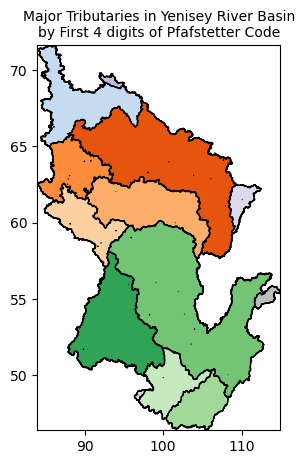

In [11]:
# Plotting
fig, ax = plt.subplots(figsize=(5, 5))
dissolved_tributaries.plot(ax=ax, cmap='tab20c', edgecolor='black')
ax.set_title('Major Tributaries in Yenisey River Basin\nby First 4 digits of Pfafstetter Code', 
            fontsize=10)

# Setting the plot limits
xmin, ymin, xmax, ymax = AGRO_Watershed.total_bounds
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

<br><br>

### Notes

The grouping of data by the first four digits of the Pfafstetter Coding System shows that there are 20 distinguishable watersheds (sub-basins). Based on background knowledge of the watershed and landscape, I am going to merge some of the sub-basins together. I created a table linking the Pfafstetter ID to the watershed name and color for plotting (shown below).

<br><br>

#### Import CSV file containing attributes based on the sub-watersheds

In [12]:
color_code_PFAF_ID_4d = pd.read_csv('HydroBasins_Watersheds_PFID4.csv')
color_code_PFAF_ID_4d = color_code_PFAF_ID_4d.dropna()
print(color_code_PFAF_ID_4d.dtypes)
# Convert from float to int64 to object for mapping
color_code_PFAF_ID_4d['PFAF_ID_4d'] = color_code_PFAF_ID_4d['PFAF_ID_4d'].astype(float).astype(int)
color_code_PFAF_ID_4d['PFAF_ID_4d'] = color_code_PFAF_ID_4d['PFAF_ID_4d'].astype(int).astype(str)
color_code_PFAF_ID_4d['Global_ID'] = color_code_PFAF_ID_4d['Global_ID'].astype(float).astype(int)
color_code_PFAF_ID_4d['Global_ID'] = color_code_PFAF_ID_4d['Global_ID'].astype(int).astype(str)

Watershed      object
PFAF_ID_4d      int64
Color          object
Watershed_1    object
Global_ID       int64
dtype: object


In [13]:
# Group by 'Global_ID' and collect unique values from other columns
merged_df = color_code_PFAF_ID_4d.groupby('Watershed').agg({# Unique Watershed names
    'Color': pd.Series.unique,   # Unique Colors
    'Global_ID': pd.Series.unique,  # Unique Global ID values
    'PFAF_ID_4d': pd.Series.unique,   # Unique Watershed names
    # Add any other columns you wish to aggregate
}).reset_index()

merged_df['Watershed_Name'] = ['Angara', 'Angara\nConfluence', 'Krasnoyarsk', 'Nizhnyaya\nTunguska', 'Nizhnyaya\nTunguska\nConfluence', 'Podkamennaya\nTunguska', 'Podkamennaya\nTunguska\nConfluence']

In [14]:
from IPython.display import HTML
# Convert DataFrame to HTML
html_table = color_code_PFAF_ID_4d.to_html()
# Display the HTML
HTML(html_table)

,Watershed,PFAF_ID_4d,Color,Watershed_1,Global_ID
0,Angara,3227,darkblue,Angara,3227
1,Angara,3228,darkblue,Angara_1,3227
2,Angara,3229,darkblue,Angara_2,3227
3,Angara,3428,darkblue,Angara_3,3227
4,Angara,3429,darkblue,Angara_4,3227
5,Angara,3610,darkblue,Angara_5,3227
6,Angara_Confluence,3225,darkcyan,Angara_Confluence,3225
7,P_Tunguska,3224,darkviolet,pt,3224
8,P_Tunguska_Confluence,3223,orchid,pt_Confluence,3223
9,P_Tunguska_Confluence,3136,orchid,pt_Confluence_1,3223


#### Aggregate the table based on the Global_ID column, which is the main tributary.

In [15]:
# Convert DataFrame to HTML
html_table_2 = merged_df.to_html()
# Display the HTML
HTML(html_table_2)

,Watershed,Color,Global_ID,PFAF_ID_4d,Watershed_Name
0,Angara,darkblue,3227,"[3227, 3228, 3229, 3428, 3429, 3610]",Angara
1,Angara_Confluence,darkcyan,3225,3225,Angara\nConfluence
2,Krasnoyarsk,darkgreen,3226,"[3226, 3124]",Krasnoyarsk
3,N_Tunguska,maroon,3222,"[3222, 3422, 3427]",Nizhnyaya\nTunguska
4,N_Tunguska_Confluence,red,3221,"[3221, 3316, 3210, 3230, 3312]",Nizhnyaya\nTunguska\nConfluence
5,P_Tunguska,darkviolet,3224,3224,Podkamennaya\nTunguska
6,P_Tunguska_Confluence,orchid,3223,"[3223, 3136]",Podkamennaya\nTunguska\nConfluence


<br><br><br>

### Create a Dictionary of geodataframes for each Watershed based on the newly created, 4-digit, Pfafstetter ID (PFAF_ID_4d)

<br><br><br>

In [16]:
def split_geodataframe(gdf, column):
    """
    Splits a GeoDataFrame based on unique values in a specified column.

    This function iterates through the unique values of the specified column in a gdf. 
    For each unique value, it creates a subset of the original gdf containing only the rows 
    where the column's value matches the unique value. These subsets are stored in a dictionary 
    with keys formatted as "w_{value}", where "{value}" is the unique value from the column.

    Parameters:
    gdf (GeoDataFrame): The GeoDataFrame to be split.
    column (str): The column name on which to split the GeoDataFrame.

    Returns:
    dict: A dictionary of GeoDataFrame subsets, with each key representing a unique value from the specified column.
    """
    subsets = {}    
    for value in gdf[column].unique():
        subset_name = f"w_{value}"
        subsets[subset_name] = gdf[gdf[column] == value]        
    return subsets

In [17]:
# Use the function to split the HydroBASINS data
watersheds_gdfs = split_geodataframe(Yenisey_HydroBASINS, 'PFAF_ID_4digits')

# Save the dictionary with pickle
#with open('watersheds_gdfs.pkl', 'wb') as file:
#    pickle.dump(watersheds_gdfs, file)

# Open the dictionary with pickle
#with open('watersheds_gdfs.pkl', 'rb') as file:
#    watersheds_gdfs = pickle.load(file)

<br><br>

#### Merge the Dictionary of Shapefiles according to the Global_ID 

<br><br>

In [18]:
watersheds_gdfs.keys()

dict_keys(['w_3124', 'w_3136', 'w_3210', 'w_3221', 'w_3223', 'w_3222', 'w_3224', 'w_3225', 'w_3227', 'w_3226', 'w_3229', 'w_3228', 'w_3230', 'w_3312', 'w_3316', 'w_3422', 'w_3427', 'w_3428', 'w_3429', 'w_3610'])

In [19]:
# Create a mapping from 'Global_ID' to the 'PFAF_ID_4d' values that need to be merged
global_to_pfaf = color_code_PFAF_ID_4d.groupby('Global_ID')['PFAF_ID_4d'].apply(list).to_dict()

# New dictionary for the merged watersheds
merged_watersheds = {}

# Iterate through each 'Global_ID' and its associated 'PFAF_ID_4d' values
for global_id, pfaf_ids in global_to_pfaf.items():
    # Collect the GeoDataFrames for merging
    gdfs_to_merge = [watersheds_gdfs[f'w_{pfaf_id}'] for pfaf_id in pfaf_ids]

    # Perform a geometric union to merge the geometries
    merged_geometry = gpd.GeoSeries([gdf.unary_union for gdf in gdfs_to_merge]).unary_union
    merged_watersheds[f'w_{global_id}'] = gpd.GeoDataFrame({'geometry': [merged_geometry]}, crs=gdfs_to_merge[0].crs)

# 'merged_watersheds' now contains only the merged watersheds, indexed by 'w_' + 'Global_ID'
watersheds_gdfs = merged_watersheds

In [20]:
watersheds_gdfs.keys()

dict_keys(['w_3221', 'w_3222', 'w_3223', 'w_3224', 'w_3225', 'w_3226', 'w_3227'])

<br><br>

#### Plot the results

<br><br>

In [21]:
# Create a color dictionary from the DataFrame
color_dict = pd.Series(color_code_PFAF_ID_4d.Color.values, index=color_code_PFAF_ID_4d.PFAF_ID_4d).to_dict()

# Use this color dictionary for assigning colors in the plot later
watershed_colors = {}

for watershed_name in watersheds_gdfs.keys():
    # Extracting the PFAF_ID_4d from the key
    pfaf_id = watershed_name.split("_")[1] 
    # Getting the color for this PFAF_ID_4d
    watershed_color = color_dict.get(pfaf_id, 'none')
    # Storing the color in the new dictionary
    watershed_colors[watershed_name] = watershed_color

(46.37338787934154, 71.62704695372541)

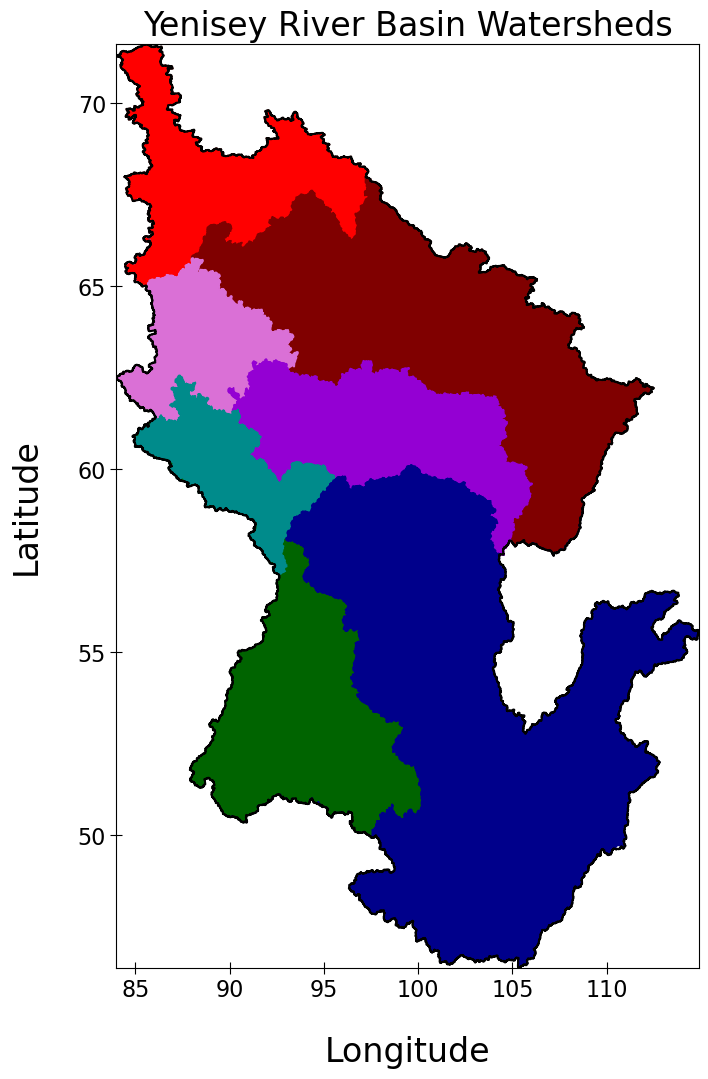

In [22]:
fig, ax = plt.subplots(figsize=(12, 12))

# Plot the watersheds using the color from watershed_colors
for watershed_name, watershed_gdf in watersheds_gdfs.items():
    # Extracting the PFAF_ID_4d from the key by stripping the "w_" prefix
    pfaf_id = watershed_name.split("_")[1]
    # Getting the color for this PFAF_ID_4d from watershed_colors
    watershed_color = watershed_colors.get(watershed_name, 'default_color')  # Use a default color if not found
    # Plotting the watershed using the retrieved color
    if not watershed_gdf.empty:
        watershed_gdf.plot(ax=ax, color=watershed_color, edgecolor=watershed_color, lw=1, zorder=1)

AGRO_Watershed.plot(ax=ax, color='none', edgecolor='black', lw=1.5, zorder=8)
ax.set_title("Yenisey River Basin Watersheds", fontsize=24)
ax.set_xlabel('Longitude', color='black', fontsize=24, labelpad=25)
ax.set_ylabel('Latitude', color='black', fontsize=24, labelpad=25)
ax.xaxis.set_tick_params(which='major', direction='inout', length=8, labelsize=16)
ax.yaxis.set_tick_params(which='major', direction='inout', length=8, labelsize=16)

# Setting the plot limits
xmin, ymin, xmax, ymax = AGRO_Watershed.total_bounds
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

<br><br>

#### Reproject the Dictionary for Area Calculations

- EPSG:3573
- WGS 84 / North Pole LAEA Canada
- https://epsg.io/3573

<br><br>

In [23]:
# Reproject and calculate the area for each watershed GeoDataFrame
for key, gdf in watersheds_gdfs.items():
    # Reproject to EPSG:3573
    gdf_3573 = gdf.to_crs(epsg=3573)
    # Calculate the area in square kilometers
    gdf_3573['area_3573_km2'] = gdf_3573.geometry.area / (10**6)
    # Store the modified GeoDataFrame back in the dictionary
    watersheds_gdfs[key] = gdf_3573

In [24]:
# Get Area for Each Watershed
for key, gdf in watersheds_gdfs.items():
    print(f"Total area of {key}: {gdf['area_3573_km2'].sum()} km²")

Total area of w_3221: 165202.23654606708 km²
Total area of w_3222: 494826.76729896554 km²
Total area of w_3223: 118899.10922510647 km²
Total area of w_3224: 239025.79457534163 km²
Total area of w_3225: 125291.26550458313 km²
Total area of w_3226: 364262.2569079021 km²
Total area of w_3227: 1069190.7775936183 km²


In [25]:
# Sum the areas of all watersheds
total_area_sum = 0
for key, gdf in watersheds_gdfs.items():
    total_area_sum += gdf['area_3573_km2'].sum()
print(f"Total area of {key}: {gdf['area_3573_km2'].sum()} km²")
print(f"Total area of all watersheds: {total_area_sum} km²")

Total area of w_3227: 1069190.7775936183 km²
Total area of all watersheds: 2576698.2076515844 km²


In [26]:
# Compare Area Coverage

# Change the CRS to an Equal Area ()
AGRO_Watershed_3573 = AGRO_Watershed.to_crs(3573)
# Calculate the total area in square kilometers
AGRO_Watershed_3573_total_area_shapefile_km2 = AGRO_Watershed_3573.geometry.area.sum() / 1e6
print(f"Total = {AGRO_Watershed_3573_total_area_shapefile_km2:.0f} km2")
print()

# Compare with Dictionary
compare_area = 2576698.2077000095/2577444
print(f"Coverage = {compare_area:.6f} %")

Total = 2577444 km2

Coverage = 0.999711 %


#### Add Area to Dataframe

In [27]:
# Create a mapping of 'Global_ID' to area
global_id_to_area = {key.split('_')[1]: gdf['area_3573_km2'].sum() for key, gdf in watersheds_gdfs.items()}
# Convert the mapping to a DataFrame
area_df = pd.DataFrame(list(global_id_to_area.items()), columns=['Global_ID', 'Total_Area_km2'])
# Step 2: Merge this DataFrame with your original CSV DataFrame
merged_df = merged_df.merge(area_df, on='Global_ID', how='left')
# 'color_code_PFAF_ID_4d_merged' now contains the area information

In [28]:
# Calculate Percent Area Coverage for Each Watershed
total_area_coverage = merged_df['Total_Area_km2'].sum()
merged_df['percent_area'] = merged_df['Total_Area_km2'] / total_area_coverage

In [29]:
merged_df

,Watershed,Color,Global_ID,PFAF_ID_4d,Watershed_Name,Total_Area_km2,percent_area
0,Angara,darkblue,3227,"[3227, 3228, 3229, 3428, 3429, 3610]",Angara,1.069191e+06,0.414946
1,Angara_Confluence,darkcyan,3225,3225,Angara\nConfluence,1.252913e+05,0.048625
2,Krasnoyarsk,darkgreen,3226,"[3226, 3124]",Krasnoyarsk,3.642623e+05,0.141368
3,N_Tunguska,maroon,3222,"[3222, 3422, 3427]",Nizhnyaya\nTunguska,4.948268e+05,0.192039
4,N_Tunguska_Confluence,red,3221,"[3221, 3316, 3210, 3230, 3312]",Nizhnyaya\nTunguska\nConfluence,1.652022e+05,0.064114
5,P_Tunguska,darkviolet,3224,3224,Podkamennaya\nTunguska,2.390258e+05,0.092764
6,P_Tunguska_Confluence,orchid,3223,"[3223, 3136]",Podkamennaya\nTunguska\nConfluence,1.188991e+05,0.046144


#### Create a Bar Plot to show area coverage for each watershed.

In [30]:
custom_order = [4,3,6,5,1,0,2]  # List of indices in the order you want
merged_df = merged_df.loc[custom_order]

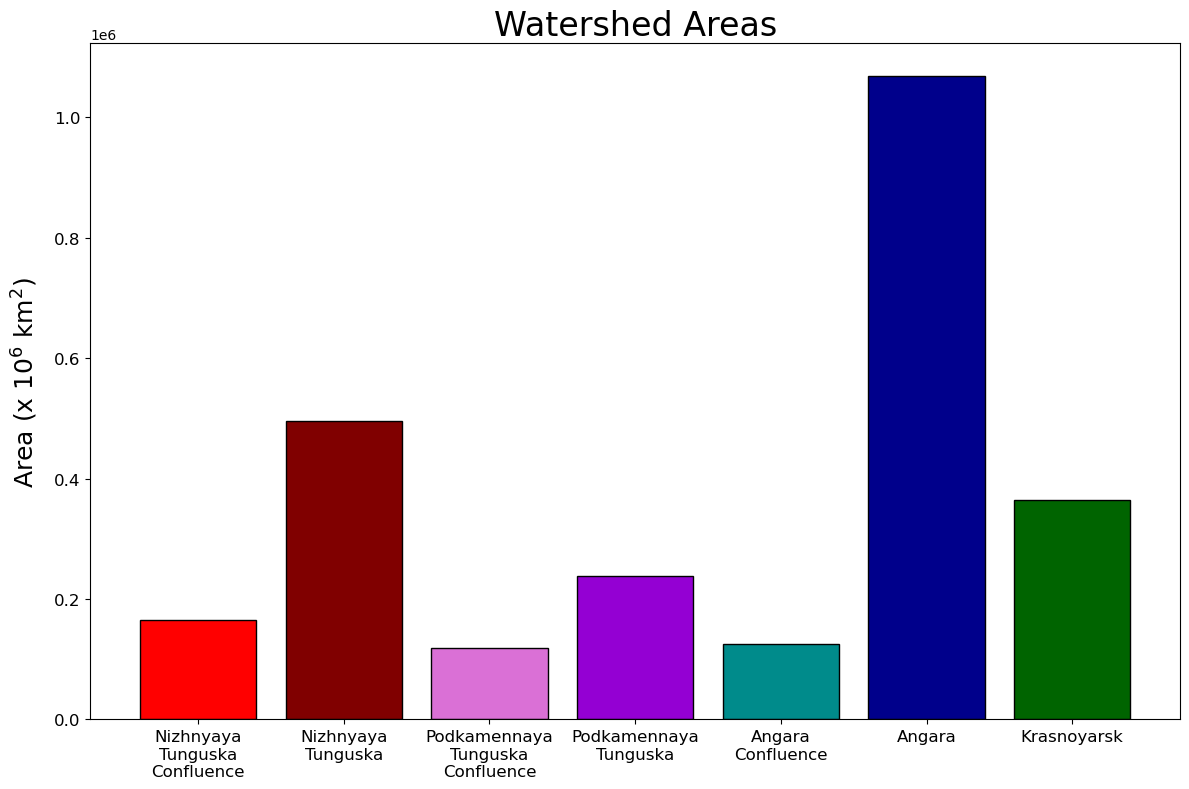

In [31]:
# Create the bar plot using the top 15 records
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(merged_df['Watershed_Name'], merged_df['Total_Area_km2'], color=merged_df['Color'], edgecolor='black', align='center')

# Set title and labels
ax.set_title('Watershed Areas', fontsize=24)
ax.set_ylabel('Area (x $10^6$ km$^2$)', fontsize=18, labelpad=10)
#ax.set_xlabel('Soil Taxonomic Classes', fontsize=14)

# Rotate x labels for better readability
plt.xticks(rotation=0, ha='center', fontsize=12)
plt.yticks(fontsize=12)
fig.tight_layout()

#fig.savefig('Chomiak_Yenisey_Final_Maps\Yenisey_Watersheds_barplot.png', dpi = 600, bbox_inches='tight')

#### Make a Color Legend

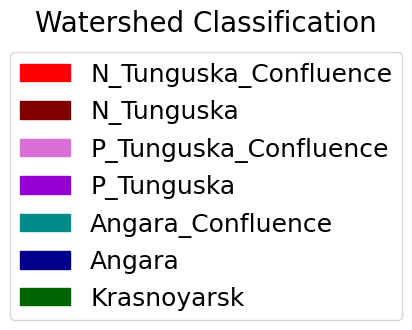

In [32]:
# Extracting colors and labels from the dictionary
colors_1 = merged_df['Color']
labels_1 = merged_df['Watershed']

# Create a list of patches for the legend
patches = [mpatches.Patch(color=color, label=label) for color, label in zip(colors_1, labels_1)]

# Create the figure for the legend
fig, ax = plt.subplots(figsize=(3, 3))  # Adjust the size based on the number of columns you want
ax.legend(handles=patches, loc='upper center', fontsize=18, ncol=1)  # Adjust ncol as needed
ax.axis('off')  # Turn off the axis
plt.title("Watershed Classification", fontsize=20)
plt.tight_layout()

<br><br>

# Conclusions

The use of the Pfafstetter Classification (PFAF_ID) from the HydroBASINS database showed to be effective in delineating the watershed. Background information on the area of interest in this region (Arctic) is crucial, since the documentation acknowledges that DEM data (SRTM), in which the Pfafstetter is built, is poor at latitudes above 60 degrees North. Nonetheless, the watersheds matched with the major tributaries of interest.

The documentation for HydroSHEDS does not discuss how to handle and process the data. This notebook is helpful for those who are new to HydroSHEDS and Python. It provides a walk-through of how to import, select, and process the data to delinate a watershed. 